# Tutorial6: Stable_diffusion

本节旨在展示使用 [stable-diffusion-3-medium-diffusers](https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers) 模型进行文生图任务。

分以下几步来实现：
1. 环境安装与应用创建
2. 下载模型
3. 文生图

Stable Diffusion 是由 Stability AI 开发的一个开源的深度学习模型，用于生成高质量图像。

## 1. 环境安装与应用创建

请确保已经执行了 [tutorial_scow_for_ai](../tutorial_scow_for_ai.md) 中的"安装依赖、注册ipykernel"。

由于本模型需要特定版本的transformers，所以请使用以下代码重装transformers：
~~~bash
pip install transformers==4.42.4
~~~

建议使用1张910B NPU运行本教程。

## 2. 下载模型

请前往 huggingface 官网注册账号、同意模型使用协议 (https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers), 然后获取 access token (https://huggingface.co/settings/tokens) 用于后续下载

建议在shell中与当前脚本相同目录下进行模型下载，而不是在应用中进行，以免造成资源浪费
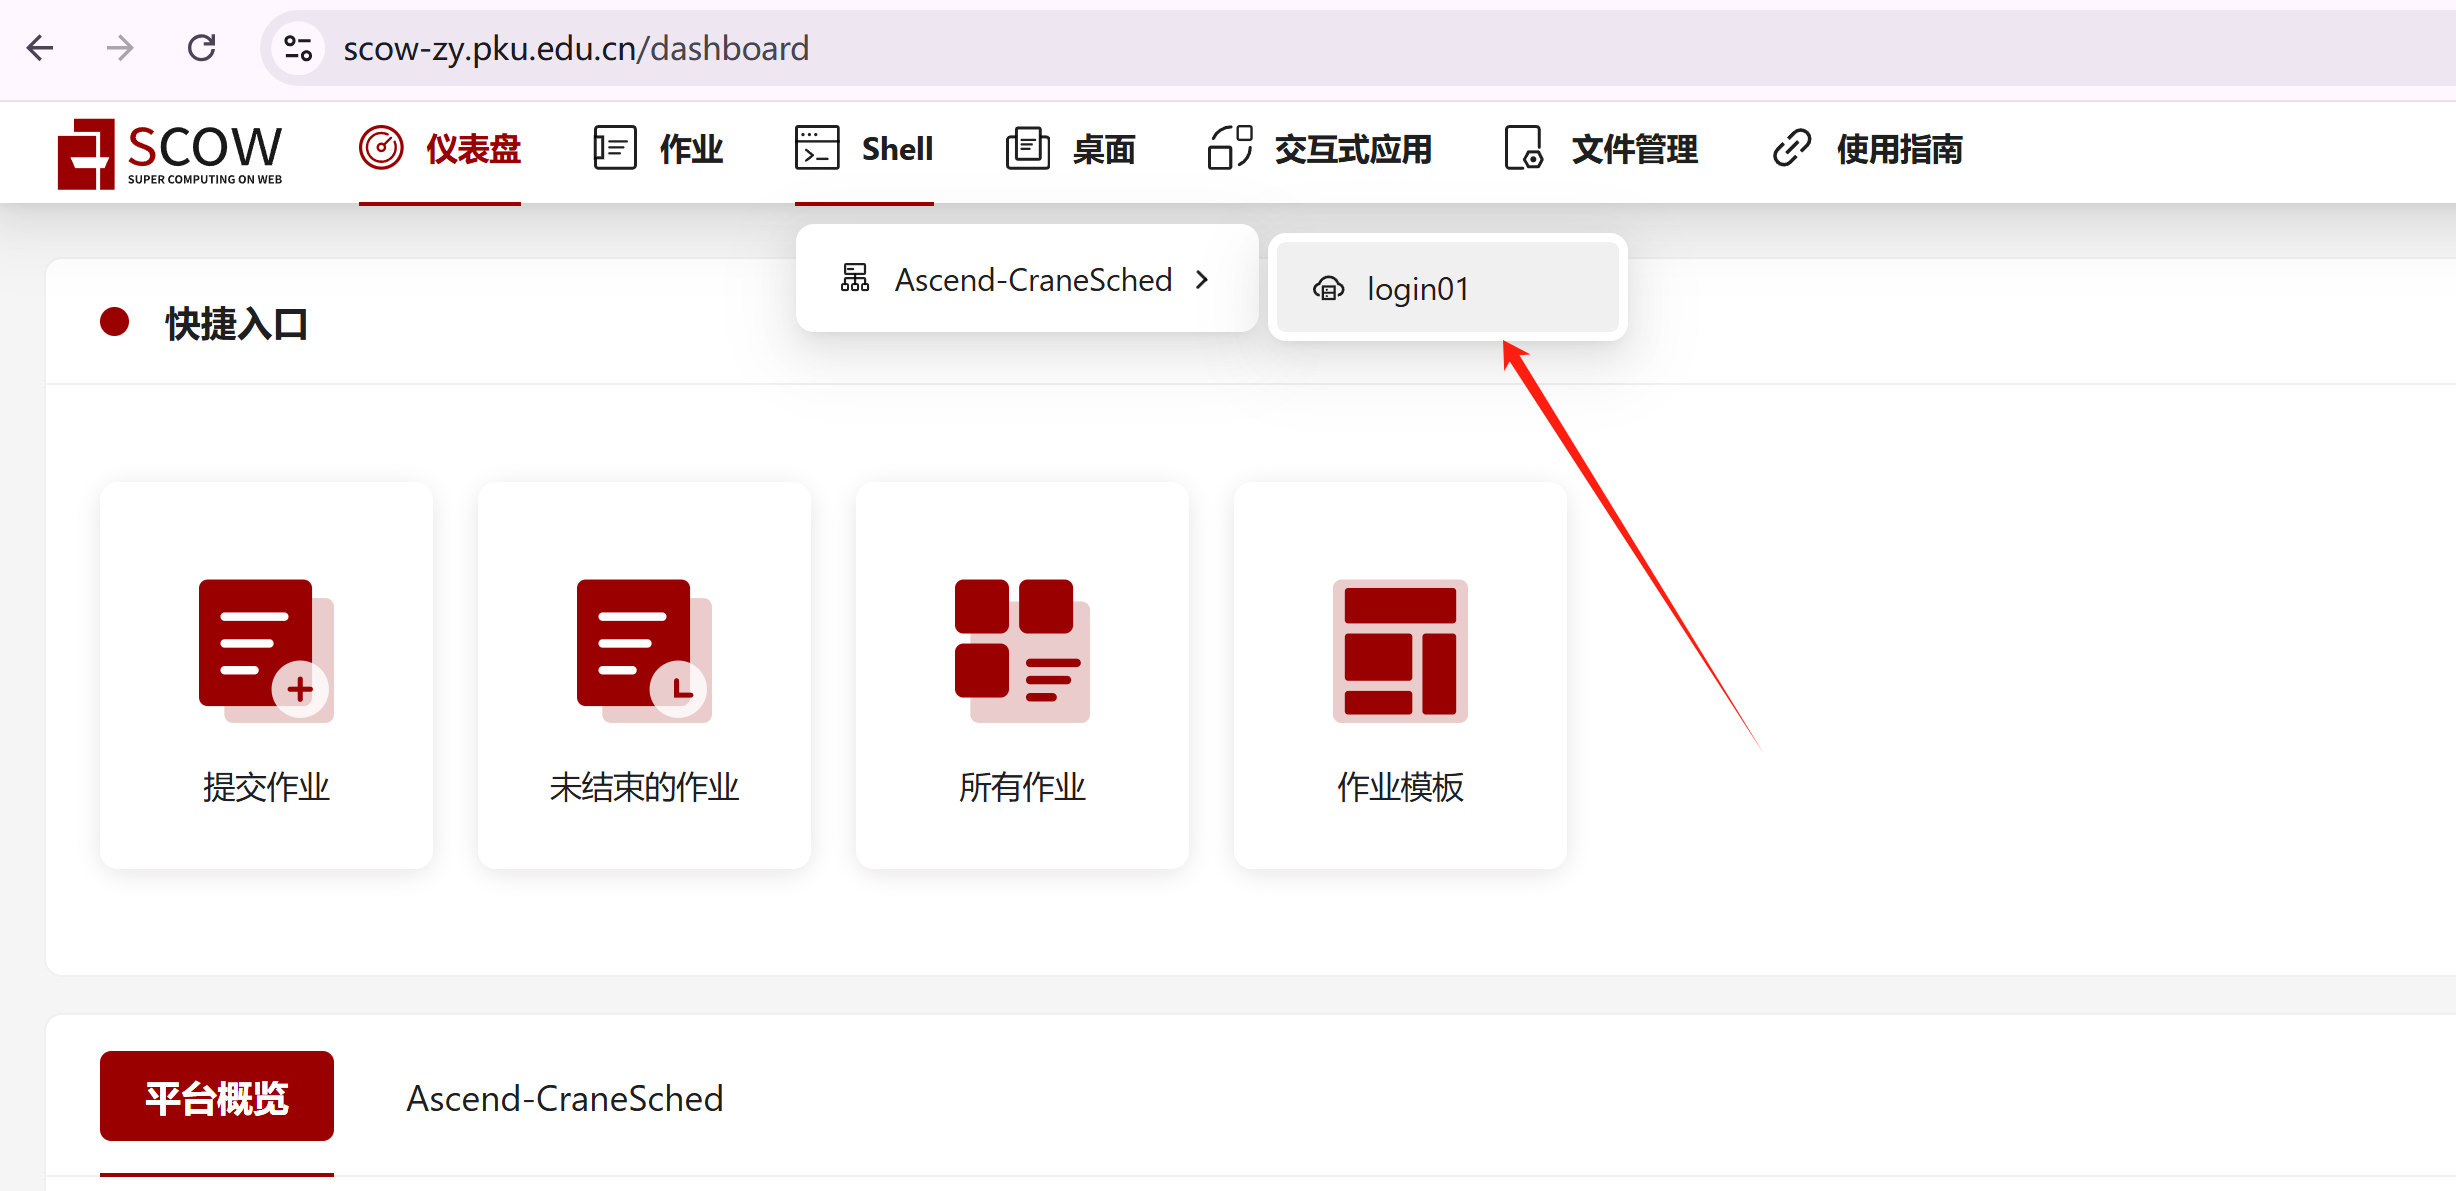

```bash

# 下载模型, 其中 "hf_***" 替换为自己的access token
export HF_ENDPOINT=https://hf-mirror.com
huggingface-cli download --token hf_*** --resume-download stabilityai/stable-diffusion-3-medium-diffusers --local-dir stabilityai/stable-diffusion-3-medium-diffusers
```



## 3. 文生图

运行以下代码，从文字生成图像：

In [ ]:
import torch
import torch_npu
from diffusers import StableDiffusion3Pipeline

# 检查 NPU 是否可用
device = torch.device("npu:0") if torch.npu.is_available() \
    else torch.device("cpu")

# 加载模型
pipe = StableDiffusion3Pipeline.from_pretrained(
    "./stabilityai/stable-diffusion-3-medium-diffusers", 
    torch_dtype=torch.float16
)

# 使用 NPU
pipe = pipe.to(device)

# prompt 内容，可以使用多个 prompt
# prompt2 = "Photorealistic"
prompt = ("Albert Einstein leans forward, holds a Qing dynasty fan. "
"A butterfly lands on the blooming peonies in the garden. "
"The fan is positioned above the butterfly.")

# 根据 prompt 生成多张图片
for i in range(10):
    image = pipe(
        prompt=prompt,
        # prompt_2=prompt2,
        negative_prompt=\
            "ugly, deformed, disfigured, poor details, bad anatomy",
        num_inference_steps=70,
        guidance_scale=7,
        height=1024,
        width=1024,
    ).images[0]

    image.save(f"{i}.png")

生成的图像在本地目录下，可点击或下载查看。

---

> 作者: 黎颖; 褚苙扬; 龙汀汀
>
> 联系方式: yingliclaire@pku.edu.cn; cly2412307718@stu.pku.edu.cn; l.tingting@pku.edu.cn